# Практическая работа 5

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

## Задание 1
Найти данные для классификации.

In [ ]:
url = 'https://raw.githubusercontent.com/InspectorJelly/BigDataMirea/refs/heads/main/datasets/insurance.csv'
data = pd.read_csv(url)

## Задание 2
Изобразить гистограмму, которая показывает баланс классов.

<ipython-input-4-355a9778a680>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column_to_plot, palette="viridis")


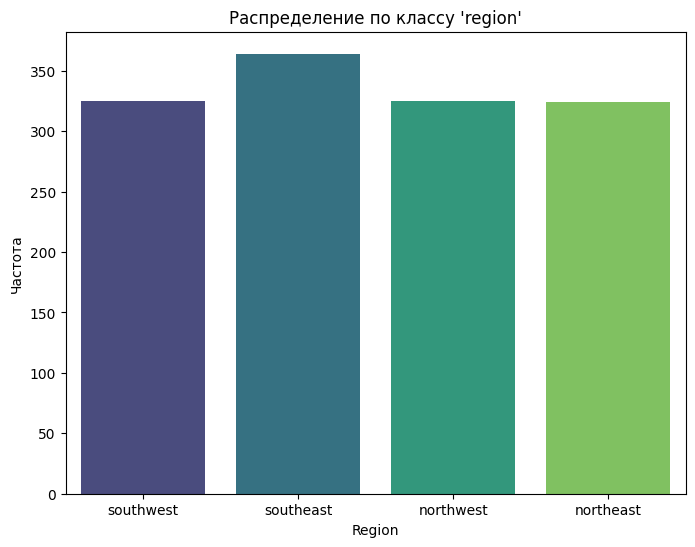

In [ ]:
column_to_plot = 'region'
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x=column_to_plot, palette="viridis")
plt.title(f"Распределение по классу '{column_to_plot}'")
plt.xlabel(column_to_plot.capitalize())
plt.ylabel("Частота")
plt.show()

## Задание 3
Разбить выборку на тренировочную и тестовую. Тренировочная для обучения модели, тестовая для проверки ее качества.

In [ ]:
X = data.drop(columns='charges')
y = data['charges']

#(80% - train, 20% - test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Размер тренировочной выборки: {X_train.shape}, {y_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}, {y_test.shape}")

Размер тренировочной выборки: (1070, 6), (1070,)
Размер тестовой выборки: (268, 6), (268,)


## Задание 4
Применить алгоритмы классификации: логистическая регрессия, SVM, KNN. Построить матрицу ошибок по результатам работы моделей

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


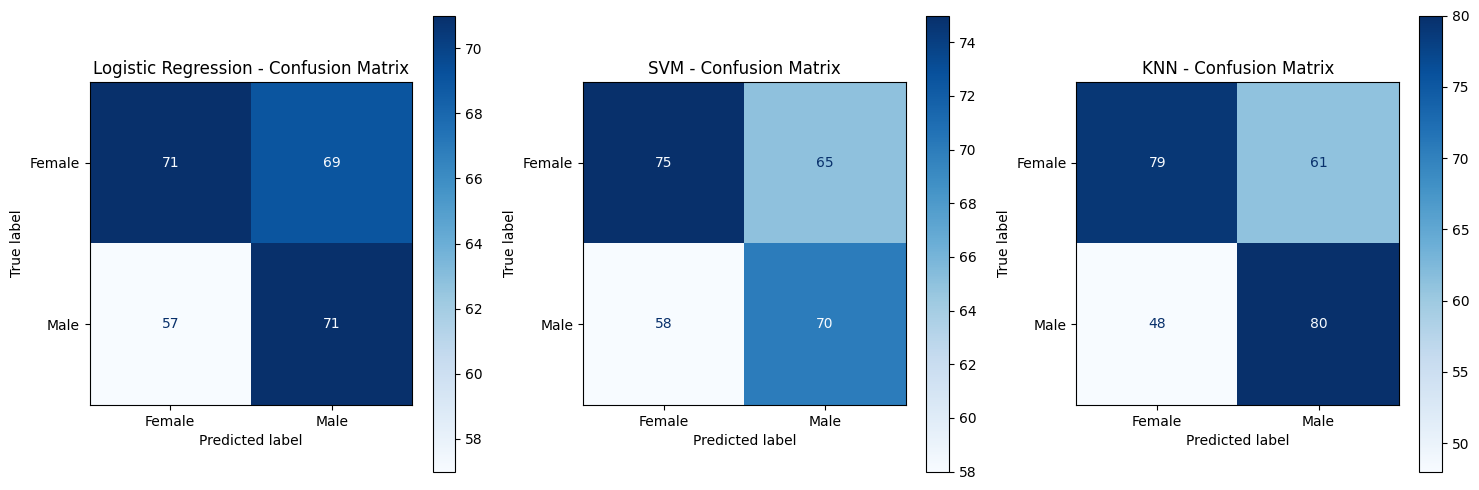

In [ ]:
X = data.drop(columns='sex')
X = pd.get_dummies(X, drop_first=True)
y = data['sex'].apply(lambda x: 1 if x == 'male' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

plt.figure(figsize=(15, 5))
for i, (model_name, model) in enumerate(models.items(), 1):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Female', 'Male'])
    plt.subplot(1, 3, i)
    disp.plot(cmap='Blues', ax=plt.gca(), values_format='d')
    plt.title(f"{model_name} - Confusion Matrix")

plt.tight_layout()
plt.show()

## Задание 5
Сравнить результаты классификации, используя accuracy, precision, recall и f1-меру.

In [ ]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Метрики для {model_name}:")
    print(classification_report(y_test, y_pred, target_names=['Female', 'Male']))
    print("="*50)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Метрики для Logistic Regression:
              precision    recall  f1-score   support

      Female       0.55      0.51      0.53       140
        Male       0.51      0.55      0.53       128

    accuracy                           0.53       268
   macro avg       0.53      0.53      0.53       268
weighted avg       0.53      0.53      0.53       268

Метрики для SVM:
              precision    recall  f1-score   support

      Female       0.56      0.54      0.55       140
        Male       0.52      0.55      0.53       128

    accuracy                           0.54       268
   macro avg       0.54      0.54      0.54       268
weighted avg       0.54      0.54      0.54       268

Метрики для KNN:
              precision    recall  f1-score   support

      Female       0.62      0.56      0.59       140
        Male       0.57      0.62      0.59       128

    accuracy                           0.59       268
   macro avg       0.59      0.59      0.59       268
weighte